In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# all_checkins_df = pd.read_csv('/content/drive/My Drive/Datathon/All-Check-ins.csv')
# london_citadel_olympic_events_df = pd.read_csv('/content/drive/My Drive/Datathon/London_Citadel_Olympic_Events.csv')
london_olympics_checkin_df = pd.read_csv('/content/drive/My Drive/Datathon/processed_data/London_Citadel_Olympic_Events.csv')
# total_london_checkin_df = pd.read_csv('/content/drive/My Drive/Datathon/Total_London_Checkin.csv')

In [ ]:
all_checkins_df.head()

,Unnamed: 0,User ID,Venue ID,UTC time,Timezone offset,Latitude,Longitude,Category,City,TimeStamp,Date
0,0,262915,4aec9f4bf964a52091c921e3,Tue Apr 03 18:00:39 +0000 2012,60,51.498044,-0.090546,Pub,London,1.333476e+09,2012-04-03 18:00:39
1,1,129494,4aec9f4bf964a52091c921e3,Sun Apr 08 18:18:30 +0000 2012,60,51.498044,-0.090546,Pub,London,1.333909e+09,2012-04-08 18:18:30
2,2,262915,4aec9f4bf964a52091c921e3,Tue Apr 10 18:16:59 +0000 2012,60,51.498044,-0.090546,Pub,London,1.334082e+09,2012-04-10 18:16:59
3,3,129494,4aec9f4bf964a52091c921e3,Wed Apr 11 20:56:49 +0000 2012,60,51.498044,-0.090546,Pub,London,1.334178e+09,2012-04-11 20:56:49
4,4,129494,4aec9f4bf964a52091c921e3,Sat Apr 14 20:29:13 +0000 2012,60,51.498044,-0.090546,Pub,London,1.334435e+09,2012-04-14 20:29:13


In [ ]:
london_citadel_olympic_events_df.head()

,Unnamed: 0,event,code,venue_cleaned,venue_loc,City,start_datetime,end_datetime,start_timestamp,end_timestamp
0,191,Archery,,lord's,"[51.529934, -0.172178]",London,2012-07-27 09:00:00,2012-07-27 11:00:00,1.343380e+09,1.343387e+09
1,192,Archery,,lord's,"[51.529934, -0.172178]",London,2012-07-27 13:00:00,2012-07-27 15:00:00,1.343394e+09,1.343401e+09
2,1048,Shooting,SH001,royal artillery barracks,"[51.487557, 0.059606]",London,2012-07-28 08:15:00,2012-07-28 16:00:00,1.343463e+09,1.343491e+09
3,1047,Shooting,SH001,royal artillery barracks,"[51.487557, 0.059606]",London,2012-07-28 08:15:00,2012-07-28 16:00:00,1.343463e+09,1.343491e+09
4,131,Badminton,BD001,wembley arena,"[51.558196, -0.282597]",London,2012-07-28 08:30:00,2012-07-28 11:00:00,1.343464e+09,1.343473e+09


In [ ]:
print(len(london_citadel_olympic_events_df['venue_cleaned'].unique()))

16


In [ ]:
london_olympics_checkin_df.head()

,Unnamed: 0,event,code,venue_cleaned,venue_loc,City,start_datetime,end_datetime,start_timestamp,end_timestamp
0,191,Archery,,lord's,"[51.529934, -0.172178]",London,2012-07-27 09:00:00,2012-07-27 11:00:00,1.343380e+09,1.343387e+09
1,192,Archery,,lord's,"[51.529934, -0.172178]",London,2012-07-27 13:00:00,2012-07-27 15:00:00,1.343394e+09,1.343401e+09
2,1048,Shooting,SH001,royal artillery barracks,"[51.487557, 0.059606]",London,2012-07-28 08:15:00,2012-07-28 16:00:00,1.343463e+09,1.343491e+09
3,1047,Shooting,SH001,royal artillery barracks,"[51.487557, 0.059606]",London,2012-07-28 08:15:00,2012-07-28 16:00:00,1.343463e+09,1.343491e+09
4,131,Badminton,BD001,wembley arena,"[51.558196, -0.282597]",London,2012-07-28 08:30:00,2012-07-28 11:00:00,1.343464e+09,1.343473e+09


In [ ]:
total_london_checkin_df.head()

,Unnamed: 0,User ID,Venue ID,UTC time,Timezone offset,Latitude,Longitude,Category,City,TimeStamp,Date
0,0,262915,4aec9f4bf964a52091c921e3,Tue Apr 03 18:00:39 +0000 2012,60,51.498044,-0.090546,Pub,London,1.333476e+09,2012-04-03 18:00:39
1,1,129494,4aec9f4bf964a52091c921e3,Sun Apr 08 18:18:30 +0000 2012,60,51.498044,-0.090546,Pub,London,1.333909e+09,2012-04-08 18:18:30
2,2,262915,4aec9f4bf964a52091c921e3,Tue Apr 10 18:16:59 +0000 2012,60,51.498044,-0.090546,Pub,London,1.334082e+09,2012-04-10 18:16:59
3,3,129494,4aec9f4bf964a52091c921e3,Wed Apr 11 20:56:49 +0000 2012,60,51.498044,-0.090546,Pub,London,1.334178e+09,2012-04-11 20:56:49
4,4,129494,4aec9f4bf964a52091c921e3,Sat Apr 14 20:29:13 +0000 2012,60,51.498044,-0.090546,Pub,London,1.334435e+09,2012-04-14 20:29:13


## Find *n* closest olympic locations to venue

### Get dictionary mapping venue to coordinates

In [ ]:
olympics_locations = london_citadel_olympic_events_df.groupby('venue_cleaned')['venue_loc'].apply(list).apply(lambda x: x[0])
olympics_locations.head()

NameError: ignored

In [ ]:
def getLongLatArr(row):
  array = row.split(',')
  latitude = float(array[0][1:])
  longitude = float(array[1][:-1])
  return [latitude, longitude]

olympics_locations = olympics_locations.apply(getLongLatArr)

NameError: ignored

In [ ]:
olympics_locations.head()

NameError: ignored

In [ ]:
print(type(olympics_locations[0]))
print(len(olympics_locations))

NameError: ignored

In [ ]:
olympics_locations_dict = olympics_locations.to_dict()

NameError: ignored

In [ ]:
olympics_locations_dict

{'earls court': [51.492483, -0.199686],
 'eton dorney': [51.493908, -0.663455],
 'excel': [51.507218, 0.030504],
 'greenwich park': [51.476958, 0.001483],
 'hadleigh farm': [51.552378, 0.597948],
 'horse guards parade': [51.504798, -0.12838],
 'hyde park': [51.508196, -0.165699],
 'lee valley white water centre': [51.688963, -0.017208],
 "lord's": [51.529934, -0.172178],
 'north greenwich arena': [51.503126, 0.003191],
 'olympic park': [51.54343, -0.016627],
 'royal artillery barracks': [51.487557, 0.059606],
 'the mall': [51.504581, -0.13436],
 'wembley arena': [51.558196, -0.282597],
 'wembley stadium': [51.556067, -0.279519],
 'wimbledon': [51.419528, -0.220417]}

In [ ]:
type(olympics_locations['earls court'])

list

## Create df of unique venues

In [ ]:
vendors_df = total_london_checkin_df.drop_duplicates(subset='Venue ID', keep='last')
vendors_df.head()

,Unnamed: 0,User ID,Venue ID,UTC time,Timezone offset,Latitude,Longitude,Category,City,TimeStamp,Date
12,12,80087,4aec9f4bf964a52091c921e3,Sun Jul 21 17:34:26 +0000 2013,60,51.498044,-0.090546,Pub,London,1.374428e+09,2013-07-21 17:34:26
13,105,78404,4b9024ccf964a5204a7833e3,Tue Apr 03 18:02:55 +0000 2012,60,51.514978,-0.302248,Restaurant,London,1.333476e+09,2012-04-03 18:02:55
15,107,200411,4bd9dff02a3a0f4726a7a8b6,Mon Nov 05 20:01:18 +0000 2012,0,51.516956,-0.070255,Indian Restaurant,London,1.352146e+09,2012-11-05 20:01:18
39,131,67135,4b044900f964a520e05222e3,Tue Jun 18 18:06:38 +0000 2013,60,51.507220,-0.221701,Portuguese Restaurant,London,1.371579e+09,2013-06-18 18:06:38
206,325,100840,4f6880ce6b74aa26bb61f7ac,Fri Sep 06 10:53:32 +0000 2013,60,51.522703,-0.085487,Coworking Space,London,1.378465e+09,2013-09-06 10:53:32


## Function that calculates olympic distance

In [ ]:
import sys
sys.path.append('/content/drive/My Drive/Datathon/')

from OlympicDistance import getOlympicDistance # calculates Olympic Distance

k = 3
vendors_df['olympic_distance'] = vendors_df.apply(getOlympicDistance, axis=1, args=(k,))
vendors_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Unnamed: 0,User ID,Venue ID,UTC time,Timezone offset,Latitude,Longitude,Category,City,TimeStamp,Date,olympic_distance
12,12,80087,4aec9f4bf964a52091c921e3,Sun Jul 21 17:34:26 +0000 2013,60,51.498044,-0.090546,Pub,London,1.374428e+09,2013-07-21 17:34:26,3.720000
13,105,78404,4b9024ccf964a5204a7833e3,Tue Apr 03 18:02:55 +0000 2012,60,51.514978,-0.302248,Restaurant,London,1.333476e+09,2012-04-03 18:02:55,5.783333
15,107,200411,4bd9dff02a3a0f4726a7a8b6,Mon Nov 05 20:01:18 +0000 2012,0,51.516956,-0.070255,Indian Restaurant,London,1.352146e+09,2012-11-05 20:01:18,4.540000
39,131,67135,4b044900f964a520e05222e3,Tue Jun 18 18:06:38 +0000 2013,60,51.507220,-0.221701,Portuguese Restaurant,London,1.371579e+09,2013-06-18 18:06:38,3.460000
206,325,100840,4f6880ce6b74aa26bb61f7ac,Fri Sep 06 10:53:32 +0000 2013,60,51.522703,-0.085487,Coworking Space,London,1.378465e+09,2013-09-06 10:53:32,4.266667


## Geographic Plots

In [ ]:
!unzip '/content/drive/My Drive/Datathon/statistical-gis-boundaries-london.zip'

Archive:  /content/drive/My Drive/Datathon/statistical-gis-boundaries-london.zip
   creating: statistical-gis-boundaries-london/ESRI/
  inflating: statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.dbf  
  inflating: statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.GSS_CODE.atx  
  inflating: statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.NAME.atx  
  inflating: statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.prj  
  inflating: statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.sbn  
  inflating: statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.sbx  
  inflating: statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp  
  inflating: statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp.xml  
  inflating: statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shx  
  inflating: statistical-gis-boundaries-london/ESRI/London_Ward.B

In [ ]:
!pip install geopandas
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

     |████████████████████████████████| 972kB 2.7MB/s 
     |████████████████████████████████| 14.7MB 307kB/s 
     |████████████████████████████████| 10.9MB 35.1MB/s 


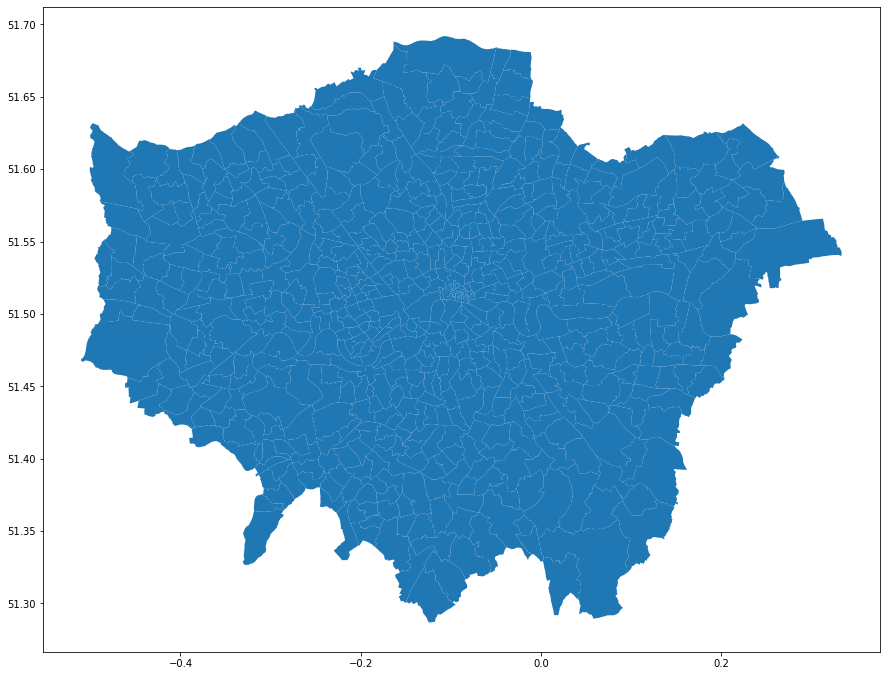

In [ ]:
london_map = gpd.read_file('statistical-gis-boundaries-london/ESRI/London_Ward.shp')
london_map = london_map.to_crs(epsg=4326)

fig, ax = plt.subplots(figsize=(15,15))
london_map.plot(ax=ax)

In [ ]:
crs = {'init': 'epsg:4326'}
data = {'Latitude': [value[0] for value in olympics_locations_dict.values()], 
        'Longitude': [value[1] for value in olympics_locations_dict.values()],
        }
plot_data = pd.DataFrame.from_dict(data)
plot_data.head()

NameError: ignored

In [ ]:
geometry = [Point(xy) for xy in zip(plot_data['Longitude'], plot_data['Latitude'])]
geometry[:3]

NameError: ignored

In [ ]:
geo_df = gpd.GeoDataFrame(plot_data, 
                      crs=crs,
                      geometry=geometry)
geo_df.head()

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,Latitude,Longitude,geometry
0,51.492483,-0.199686,POINT (-0.19969 51.49248)
1,51.493908,-0.663455,POINT (-0.66346 51.49391)
2,51.507218,0.030504,POINT (0.03050 51.50722)
3,51.476958,0.001483,POINT (0.00148 51.47696)
4,51.552378,0.597948,POINT (0.59795 51.55238)


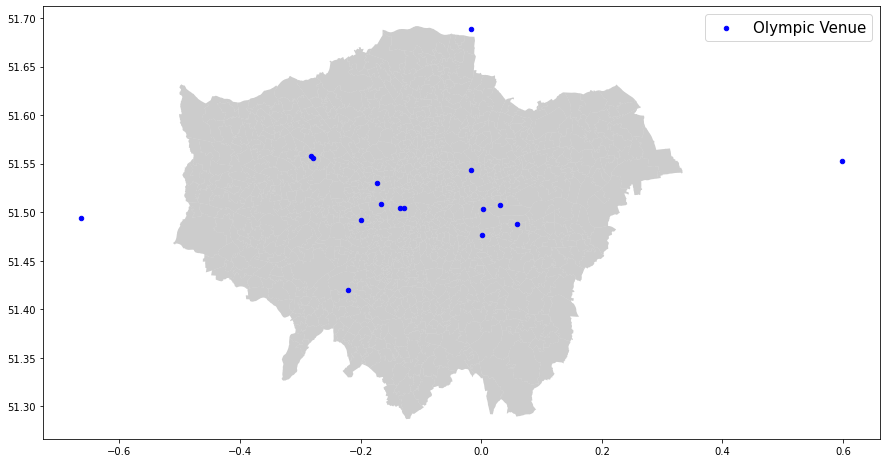

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
london_map.plot(ax=ax, alpha=0.4, color='gray')
geo_df.plot(ax=ax, markersize=20, color='blue', marker='o', label='Olympic Venue')
plt.legend(prop={'size':15})

In [ ]:
vendor_geometry = [Point(xy) for xy in zip(vendors_df['Longitude'], vendors_df['Latitude'])]

vendor_geo_df = gpd.GeoDataFrame(vendors_df, 
                      crs=crs,
                      geometry=vendor_geometry)
vendor_geo_df.head()

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,Unnamed: 0,User ID,Venue ID,UTC time,Timezone offset,Latitude,Longitude,Category,City,TimeStamp,Date,olympic_distance,geometry
12,12,80087,4aec9f4bf964a52091c921e3,Sun Jul 21 17:34:26 +0000 2013,60,51.498044,-0.090546,Pub,London,1.374428e+09,2013-07-21 17:34:26,3.720000,POINT (-0.09055 51.49804)
13,105,78404,4b9024ccf964a5204a7833e3,Tue Apr 03 18:02:55 +0000 2012,60,51.514978,-0.302248,Restaurant,London,1.333476e+09,2012-04-03 18:02:55,5.783333,POINT (-0.30225 51.51498)
15,107,200411,4bd9dff02a3a0f4726a7a8b6,Mon Nov 05 20:01:18 +0000 2012,0,51.516956,-0.070255,Indian Restaurant,London,1.352146e+09,2012-11-05 20:01:18,4.540000,POINT (-0.07025 51.51696)
39,131,67135,4b044900f964a520e05222e3,Tue Jun 18 18:06:38 +0000 2013,60,51.507220,-0.221701,Portuguese Restaurant,London,1.371579e+09,2013-06-18 18:06:38,3.460000,POINT (-0.22170 51.50722)
206,325,100840,4f6880ce6b74aa26bb61f7ac,Fri Sep 06 10:53:32 +0000 2013,60,51.522703,-0.085487,Coworking Space,London,1.378465e+09,2013-09-06 10:53:32,4.266667,POINT (-0.08549 51.52270)


In [ ]:
print(len(vendor_geo_df))

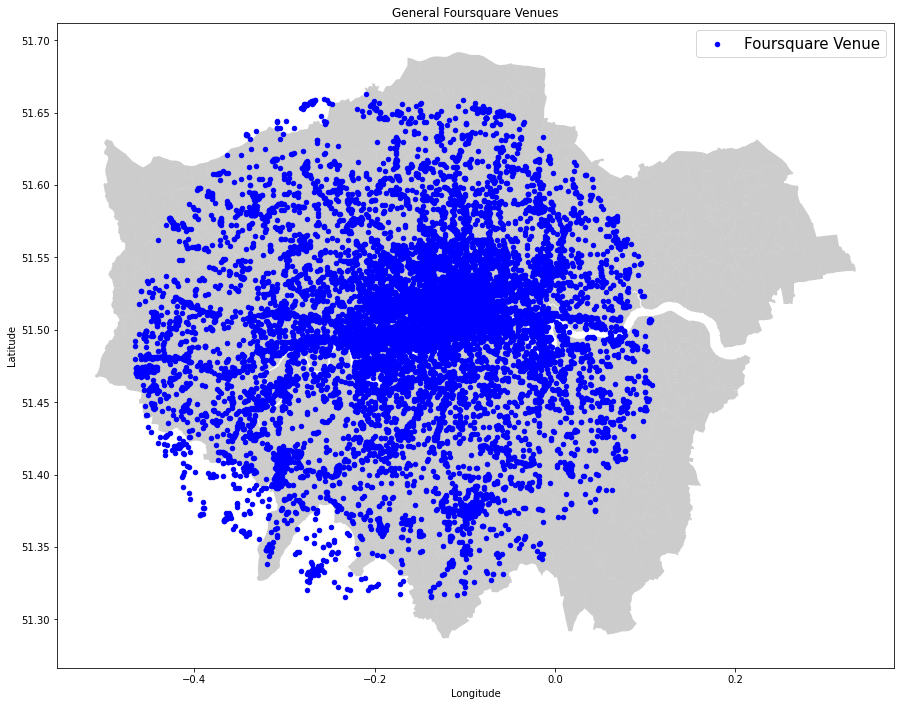

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
london_map.plot(ax=ax, alpha=0.4, color='gray')
vendor_geo_df.plot(ax=ax, markersize=20, color='blue', marker='o', label='Foursquare Venue')
plt.title('General Foursquare Venues')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(prop={'size':15})

## Daily Check-in Plots

In [ ]:
vendors_df.head()

,Unnamed: 0,User ID,Venue ID,UTC time,Timezone offset,Latitude,Longitude,Category,City,TimeStamp,Date,olympic_distance,geometry
12,12,80087,4aec9f4bf964a52091c921e3,Sun Jul 21 17:34:26 +0000 2013,60,51.498044,-0.090546,Pub,London,1.374428e+09,2013-07-21 17:34:26,3.720000,POINT (-0.09055 51.49804)
13,105,78404,4b9024ccf964a5204a7833e3,Tue Apr 03 18:02:55 +0000 2012,60,51.514978,-0.302248,Restaurant,London,1.333476e+09,2012-04-03 18:02:55,5.783333,POINT (-0.30225 51.51498)
15,107,200411,4bd9dff02a3a0f4726a7a8b6,Mon Nov 05 20:01:18 +0000 2012,0,51.516956,-0.070255,Indian Restaurant,London,1.352146e+09,2012-11-05 20:01:18,4.540000,POINT (-0.07025 51.51696)
39,131,67135,4b044900f964a520e05222e3,Tue Jun 18 18:06:38 +0000 2013,60,51.507220,-0.221701,Portuguese Restaurant,London,1.371579e+09,2013-06-18 18:06:38,3.460000,POINT (-0.22170 51.50722)
206,325,100840,4f6880ce6b74aa26bb61f7ac,Fri Sep 06 10:53:32 +0000 2013,60,51.522703,-0.085487,Coworking Space,London,1.378465e+09,2013-09-06 10:53:32,4.266667,POINT (-0.08549 51.52270)


In [ ]:
vendors_df['Category'].unique()

array(['Pub', 'Restaurant', 'Indian Restaurant', 'Portuguese Restaurant',
       'Coworking Space', 'Office', 'Coffee Shop', 'Concert Hall',
       'Clothing Store', 'Home (private)', 'Gay Bar', 'Bar',
       'Sandwich Place', 'Airport Terminal', 'Liquor Store',
       'Caf\x1a\x1a', 'Performing Arts Venue', 'Subway',
       'Vietnamese Restaurant', 'Beer Garden', 'Chinese Restaurant',
       'City Hall', 'Italian Restaurant', 'Church', 'Japanese Restaurant',
       'Train Station', 'Bus Station', 'Movie Theater', 'Hotel', 'Park',
       'Electronics Store', 'Department Store', 'Steakhouse',
       'Hot Spring', 'Gym Pool', 'Road', 'Bridge', 'Harbor / Marina',
       'Malaysian Restaurant', 'Soccer Field', 'College Residence Hall',
       'Platform', 'Grocery Store', 'Airport Gate', 'Scenic Lookout',
       'Toy / Game Store', 'Mexican Restaurant', 'Diner', 'Music Venue',
       'Gym / Fitness Center', 'Cocktail Bar', 'Asian Restaurant',
       'Soccer Stadium', 'Laundry Service', 'Tec

In [ ]:
checkin_london_complete_df = pd.read_csv('/content/drive/My Drive/Datathon/processed_data/checkin_london_complete.csv')
checkin_london_complete_df.head()

,Unnamed: 0,User ID,Venue ID,UTC time,Timezone offset,Latitude,Longitude,Category,City,TimeStamp,Date
0,0,262915,4aec9f4bf964a52091c921e3,Tue Apr 03 18:00:39 +0000 2012,60,51.498044,-0.090546,Pub,London,1.333476e+09,2012-04-03 18:00:39
1,1,129494,4aec9f4bf964a52091c921e3,Sun Apr 08 18:18:30 +0000 2012,60,51.498044,-0.090546,Pub,London,1.333909e+09,2012-04-08 18:18:30
2,2,262915,4aec9f4bf964a52091c921e3,Tue Apr 10 18:16:59 +0000 2012,60,51.498044,-0.090546,Pub,London,1.334082e+09,2012-04-10 18:16:59
3,3,129494,4aec9f4bf964a52091c921e3,Wed Apr 11 20:56:49 +0000 2012,60,51.498044,-0.090546,Pub,London,1.334178e+09,2012-04-11 20:56:49
4,4,129494,4aec9f4bf964a52091c921e3,Sat Apr 14 20:29:13 +0000 2012,60,51.498044,-0.090546,Pub,London,1.334435e+09,2012-04-14 20:29:13


In [ ]:
checkin_london_complete_df['Cleaned_Date'] = checkin_london_complete_df['Date'].apply(lambda x: x.split(' ')[0])
checkin_london_complete_df.head()

,Unnamed: 0,User ID,Venue ID,UTC time,Timezone offset,Latitude,Longitude,Category,City,TimeStamp,Date,Cleaned_Date
0,0,262915,4aec9f4bf964a52091c921e3,Tue Apr 03 18:00:39 +0000 2012,60,51.498044,-0.090546,Pub,London,1.333476e+09,2012-04-03 18:00:39,2012-04-03
1,1,129494,4aec9f4bf964a52091c921e3,Sun Apr 08 18:18:30 +0000 2012,60,51.498044,-0.090546,Pub,London,1.333909e+09,2012-04-08 18:18:30,2012-04-08
2,2,262915,4aec9f4bf964a52091c921e3,Tue Apr 10 18:16:59 +0000 2012,60,51.498044,-0.090546,Pub,London,1.334082e+09,2012-04-10 18:16:59,2012-04-10
3,3,129494,4aec9f4bf964a52091c921e3,Wed Apr 11 20:56:49 +0000 2012,60,51.498044,-0.090546,Pub,London,1.334178e+09,2012-04-11 20:56:49,2012-04-11
4,4,129494,4aec9f4bf964a52091c921e3,Sat Apr 14 20:29:13 +0000 2012,60,51.498044,-0.090546,Pub,London,1.334435e+09,2012-04-14 20:29:13,2012-04-14


In [ ]:
checkin_london_complete_df['Cleaned_Date'] = pd.to_datetime(checkin_london_complete_df['Cleaned_Date'])
type(checkin_london_complete_df['Cleaned_Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
daily_total_checkins_df = checkin_london_complete_df.groupby('Cleaned_Date')['User ID'].count()
daily_total_checkins_df.head()

Cleaned_Date
2012-04-03    175
2012-04-04    689
2012-04-05    159
2012-04-06    247
2012-04-07    504
Name: User ID, dtype: int64

In [ ]:
print(daily_total_checkins_df.index)

DatetimeIndex(['2012-04-03', '2012-04-04', '2012-04-05', '2012-04-06',
               '2012-04-07', '2012-04-08', '2012-04-09', '2012-04-10',
               '2012-04-11', '2012-04-12',
               ...
               '2013-09-07', '2013-09-08', '2013-09-09', '2013-09-10',
               '2013-09-11', '2013-09-12', '2013-09-13', '2013-09-14',
               '2013-09-15', '2013-09-16'],
              dtype='datetime64[ns]', name='Cleaned_Date', length=455, freq=None)


In [ ]:
# April 28
# November 10
start_date = '2012-4-28'
end_date = '2012-11-10'

mask = (daily_total_checkins_df.index >= start_date) & (daily_total_checkins_df.index <= end_date)
daily_total_checkins_df = daily_total_checkins_df.loc[mask]
daily_total_checkins_df.head()

Cleaned_Date
2012-04-28    951
2012-04-29    734
2012-05-01    346
2012-05-02    434
2012-05-03    916
Name: User ID, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

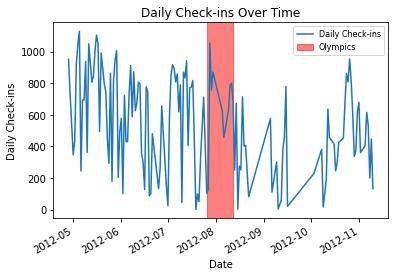

In [ ]:
daily_checkins = daily_total_checkins_df.plot.line(label='Daily Check-ins')
daily_checkins.set_xlabel('Date')
daily_checkins.set_ylabel('Daily Check-ins')
daily_checkins.set_title('Daily Check-ins Over Time')
daily_checkins.axvspan(datetime(2012,7,26), datetime(2012,8,12), color='red', alpha=0.5, label='Olympics')
daily_checkins.legend(prop={'size':8})

In [ ]:
venue_main_category_df = pd.read_csv('/content/drive/My Drive/Datathon/processed_data/venue_main_category.csv')
venue_main_category_df.head()

,Venue ID,Latitude,Longitude,Category,MainCategory
0,4aec9f4bf964a52091c921e3,51.498044,-0.090546,Pub,Nightlife Spot
1,4b9024ccf964a5204a7833e3,51.514978,-0.302248,Restaurant,Food
2,4bd9dff02a3a0f4726a7a8b6,51.516956,-0.070255,Indian Restaurant,Food
3,4b044900f964a520e05222e3,51.507220,-0.221701,Portuguese Restaurant,Food
4,4f6880ce6b74aa26bb61f7ac,51.522703,-0.085487,Coworking Space,Professional & Other Places


In [ ]:
assert len(venue_main_category_df['Venue ID']) == len(venue_main_category_df['Venue ID'].unique())

In [ ]:
venue_category_dict = dict(zip(venue_main_category_df['Venue ID'], venue_main_category_df['MainCategory']))
venue_category_dict

{'4aec9f4bf964a52091c921e3': 'Nightlife Spot',
 '4b9024ccf964a5204a7833e3': 'Food',
 '4bd9dff02a3a0f4726a7a8b6': 'Food',
 '4b044900f964a520e05222e3': 'Food',
 '4f6880ce6b74aa26bb61f7ac': 'Professional & Other Places',
 '4ac518d2f964a52007a720e3': 'Professional & Other Places',
 '4e6f89aa1fc7c08369520840': 'Food',
 '4ac518eaf964a520f4ab20e3': 'Arts & Entertainment',
 '4f181582e4b0f1e7bafdba4c': 'Shop & Service',
 '4f5e63c7e4b0569e046881e2': 'Residence',
 '4ad1feb8f964a520bbde20e3': 'Nightlife Spot',
 '4ad9f6ddf964a520751c21e3': 'Nightlife Spot',
 '4b7d87fdf964a520dbc42fe3': 'Nightlife Spot',
 '4b7bf6abf964a52004762fe3': 'Food',
 '4c1e5386fcf8c9b66e10ad0b': 'Food',
 '4c18fe2d6a21c9b670d6c997': 'Travel & Transport',
 '4ba0eaa7f964a520d88637e3': 'Shop & Service',
 '4c274c0bf1272d7f4eed87c5': 'Food',
 '4b0bf426f964a5200e3523e3': 'Arts & Entertainment',
 '4b8956d8f964a520df2c32e3': 'Food',
 '4ae15aedf964a520f88521e3': 'Travel & Transport',
 '4ed4bcab7beb5f8ffac8e762': 'Food',
 '4dc03e7c6a23e

In [ ]:
mask = (checkin_london_complete_df['Cleaned_Date'] >= start_date) & (checkin_london_complete_df['Cleaned_Date'] <= end_date)
checkin_london_complete_df = checkin_london_complete_df.loc[mask]
checkin_london_complete_df.head()

,Unnamed: 0,User ID,Venue ID,UTC time,Timezone offset,Latitude,Longitude,Category,City,TimeStamp,Date,Cleaned_Date
6,6,129494,4aec9f4bf964a52091c921e3,Sun May 13 12:46:54 +0000 2012,60,51.498044,-0.090546,Pub,London,1.336913e+09,2012-05-13 12:46:54,2012-05-13
7,7,80087,4aec9f4bf964a52091c921e3,Sun May 27 15:12:03 +0000 2012,60,51.498044,-0.090546,Pub,London,1.338132e+09,2012-05-27 15:12:03,2012-05-27
8,8,262915,4aec9f4bf964a52091c921e3,Fri Jun 01 17:35:03 +0000 2012,60,51.498044,-0.090546,Pub,London,1.338572e+09,2012-06-01 17:35:03,2012-06-01
9,9,9671,4aec9f4bf964a52091c921e3,Sun Aug 05 11:58:01 +0000 2012,60,51.498044,-0.090546,Pub,London,1.344168e+09,2012-08-05 11:58:01,2012-08-05
15,107,200411,4bd9dff02a3a0f4726a7a8b6,Mon Nov 05 20:01:18 +0000 2012,0,51.516956,-0.070255,Indian Restaurant,London,1.352146e+09,2012-11-05 20:01:18,2012-11-05


In [ ]:
checkin_london_complete_df['MainCategory'] = checkin_london_complete_df['Venue ID'].apply(lambda x: venue_category_dict[x])
checkin_london_complete_df.head()

,Unnamed: 0,User ID,Venue ID,UTC time,Timezone offset,Latitude,Longitude,Category,City,TimeStamp,Date,Cleaned_Date,MainCategory
6,6,129494,4aec9f4bf964a52091c921e3,Sun May 13 12:46:54 +0000 2012,60,51.498044,-0.090546,Pub,London,1.336913e+09,2012-05-13 12:46:54,2012-05-13,Nightlife Spot
7,7,80087,4aec9f4bf964a52091c921e3,Sun May 27 15:12:03 +0000 2012,60,51.498044,-0.090546,Pub,London,1.338132e+09,2012-05-27 15:12:03,2012-05-27,Nightlife Spot
8,8,262915,4aec9f4bf964a52091c921e3,Fri Jun 01 17:35:03 +0000 2012,60,51.498044,-0.090546,Pub,London,1.338572e+09,2012-06-01 17:35:03,2012-06-01,Nightlife Spot
9,9,9671,4aec9f4bf964a52091c921e3,Sun Aug 05 11:58:01 +0000 2012,60,51.498044,-0.090546,Pub,London,1.344168e+09,2012-08-05 11:58:01,2012-08-05,Nightlife Spot
15,107,200411,4bd9dff02a3a0f4726a7a8b6,Mon Nov 05 20:01:18 +0000 2012,0,51.516956,-0.070255,Indian Restaurant,London,1.352146e+09,2012-11-05 20:01:18,2012-11-05,Food


In [ ]:
len(checkin_london_complete_df['MainCategory'].unique())

10

In [ ]:
daily_checkins_category_df = checkin_london_complete_df.groupby(['Cleaned_Date', 'MainCategory'])['User ID'].count()

In [ ]:
daily_checkins_category_df.head(20)

Cleaned_Date  MainCategory               
2012-04-28    Arts & Entertainment            98
              College & University            16
              Event                            4
              Food                           188
              Nightlife Spot                 126
              Outdoors & Recreation           84
              Professional & Other Places     36
              Residence                       41
              Shop & Service                 143
              Travel & Transport             215
2012-04-29    Arts & Entertainment            83
              College & University             9
              Event                            3
              Food                           143
              Nightlife Spot                  72
              Outdoors & Recreation           67
              Professional & Other Places     31
              Residence                       35
              Shop & Service                  96
              Travel & Tran

In [ ]:
daily_checkins_category_df = daily_checkins_category_df.unstack(level=1)

In [ ]:
daily_checkins_category_df.head()

MainCategory,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
Cleaned_Date,,,,,,,,,,
2012-04-28,98.0,16.0,4.0,188.0,126.0,84.0,36.0,41.0,143.0,215.0
2012-04-29,83.0,9.0,3.0,143.0,72.0,67.0,31.0,35.0,96.0,195.0
2012-05-01,26.0,1.0,2.0,62.0,44.0,37.0,31.0,22.0,24.0,97.0
2012-05-02,14.0,22.0,3.0,63.0,12.0,43.0,104.0,11.0,39.0,123.0
2012-05-03,56.0,32.0,21.0,174.0,120.0,70.0,129.0,23.0,95.0,196.0


In [ ]:
prop_daily_checkins_category_df = daily_checkins_category_df.div(daily_checkins_category_df.sum(axis=1), axis=0)
prop_daily_checkins_category_df.head()

MainCategory,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
Cleaned_Date,,,,,,,,,,
2012-04-28,0.103049,0.016824,0.004206,0.197687,0.132492,0.088328,0.037855,0.043113,0.150368,0.226078
2012-04-29,0.113079,0.012262,0.004087,0.194823,0.098093,0.091281,0.042234,0.047684,0.130790,0.265668
2012-05-01,0.075145,0.002890,0.005780,0.179191,0.127168,0.106936,0.089595,0.063584,0.069364,0.280347
2012-05-02,0.032258,0.050691,0.006912,0.145161,0.027650,0.099078,0.239631,0.025346,0.089862,0.283410
2012-05-03,0.061135,0.034934,0.022926,0.189956,0.131004,0.076419,0.140830,0.025109,0.103712,0.213974


In [ ]:
filtered_daily_checkins_df = prop_daily_checkins_category_df[['Nightlife Spot', 'Travel & Transport', 'Food', 'Arts & Entertainment']]

In [ ]:
filtered_daily_checkins_df.head()

MainCategory,Nightlife Spot,Travel & Transport,Food,Arts & Entertainment
Cleaned_Date,,,,
2012-04-28,0.132492,0.226078,0.197687,0.103049
2012-04-29,0.098093,0.265668,0.194823,0.113079
2012-05-01,0.127168,0.280347,0.179191,0.075145
2012-05-02,0.027650,0.283410,0.145161,0.032258
2012-05-03,0.131004,0.213974,0.189956,0.061135


In [ ]:
len(filtered_daily_checkins_df)

137

In [ ]:
averaged_filtered_df = filtered_daily_checkins_df.groupby(np.arange(len(filtered_daily_checkins_df))//5).mean()
averaged_filtered_df.head()

MainCategory,Nightlife Spot,Travel & Transport,Food,Arts & Entertainment
0,0.103281,0.253895,0.181364,0.076933
1,0.129560,0.229722,0.194465,0.079517
2,0.113702,0.239082,0.189490,0.071736
3,0.098806,0.252836,0.189494,0.055146
4,0.084384,0.277645,0.162393,0.064417


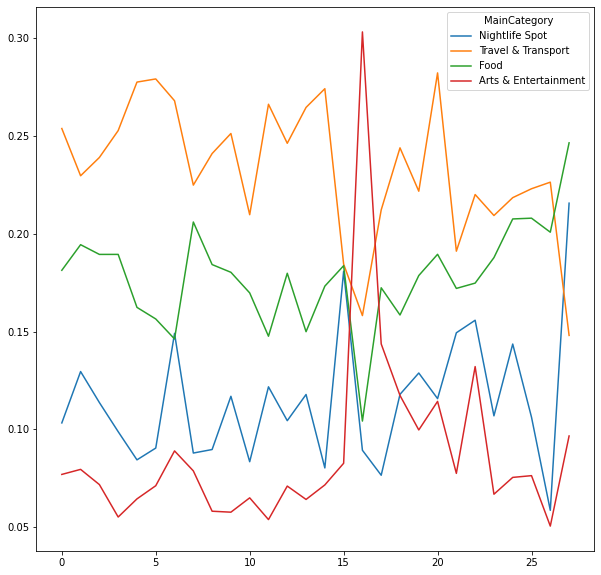

In [ ]:
averaged_filtered_plot = averaged_filtered_df.plot.line(figsize=(10,10))

In [ ]:
avg_daily_checkins = daily_checkins_category_df.groupby(np.arange(len(daily_checkins_category_df))//5).mean()
avg_daily_checkins.head()

MainCategory,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,55.4,16.0,6.6,126.0,74.8,60.2,66.2,26.4,79.4,165.2
1,62.0,13.6,5.0,147.6,92.8,71.2,60.6,36.6,95.6,175.6
2,59.6,23.2,5.6,157.8,89.0,88.4,82.0,34.4,83.6,194.0
3,49.4,30.2,8.6,167.6,80.4,85.2,123.2,40.4,83.8,228.6
4,45.8,14.0,8.4,112.2,57.2,76.8,75.2,29.0,69.4,166.8


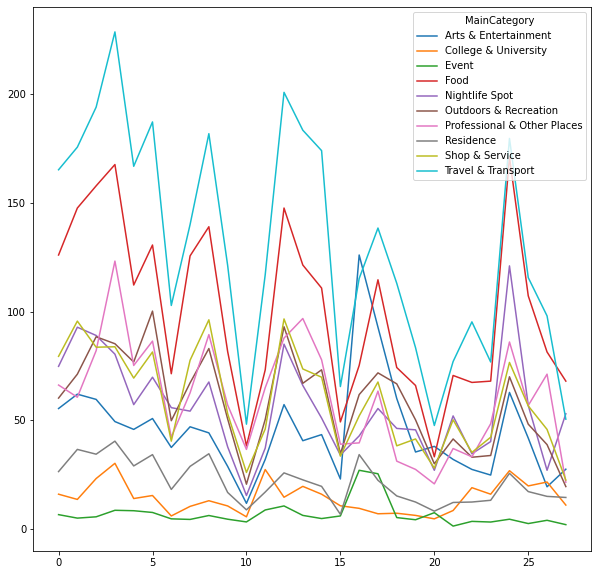

In [ ]:
avg_daily_checkins_plot = avg_daily_checkins.plot.line(figsize=(10,10))

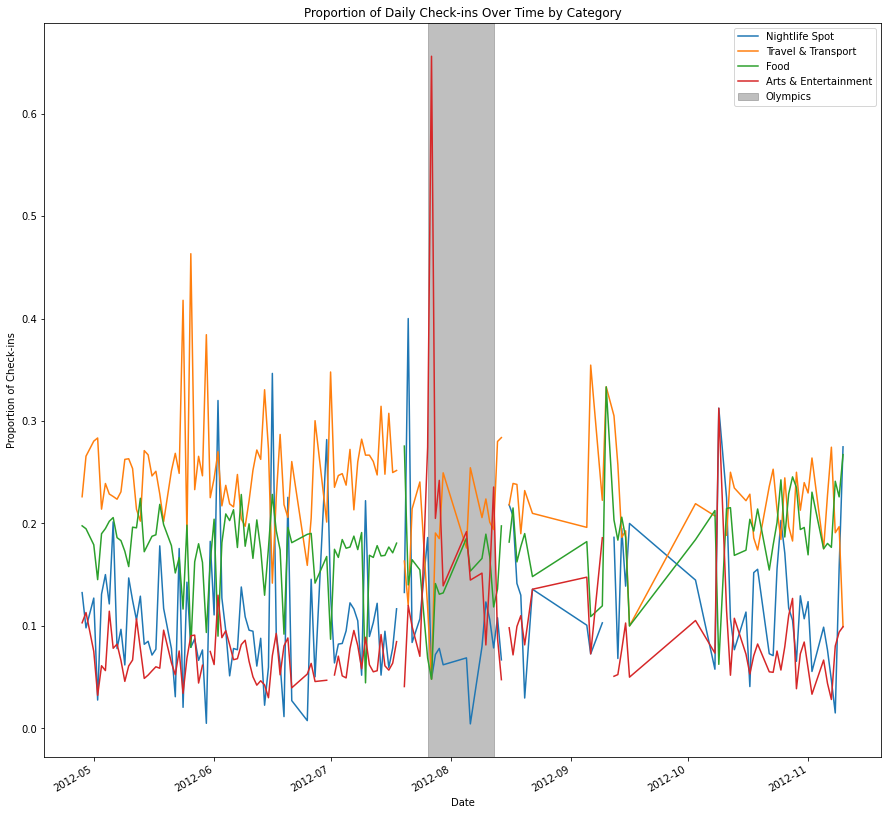

In [ ]:
filtered_daily_checkins_df_plot = filtered_daily_checkins_df.plot.line(figsize=(15,15))
filtered_daily_checkins_df_plot.set_xlabel('Date')
filtered_daily_checkins_df_plot.set_ylabel('Proportion of Check-ins')
filtered_daily_checkins_df_plot.set_title('Proportion of Daily Check-ins Over Time by Category')
filtered_daily_checkins_df_plot.axvspan(datetime(2012,7,26), datetime(2012,8,12), color='gray', alpha=0.5, label='Olympics')
filtered_daily_checkins_df_plot.legend()

## Geographic Plots

In [ ]:
checkin_london_3weeks_df = pd.read_csv('/content/drive/My Drive/Datathon/processed_data/checkin_london_3week_before_after.csv')
checkin_london_3weeks_df.head()

,Unnamed: 0,Venue ID,#checkin_before,#checkin_after,checkin_increase
0,0,4a5f9446f964a520e0bf1fe3,1,1,0
1,1,4abe4502f964a520558c20e3,33,31,0
2,2,4abf8c03f964a520079120e3,57,24,0
3,3,4ac51183f964a52048a020e3,6,6,0
4,4,4ac51183f964a52049a020e3,2,6,1


In [ ]:
len(checkin_london_3weeks_df['Venue ID'].unique())

1605

In [ ]:
grouped_coords_df = checkin_london_complete_df.groupby('Venue ID')[['Latitude', 'Longitude']].max()
grouped_coords_df.head()

,Latitude,Longitude
Venue ID,,
4a5f9446f964a520e0bf1fe3,51.494770,-0.182719
4abcec53f964a520b98720e3,51.508207,-0.131414
4abdc1c7f964a5206d8b20e3,51.523150,-0.105242
4abe4502f964a520558c20e3,51.501303,-0.142103
4abe5714f964a520d68c20e3,51.514157,-0.130879


In [ ]:
len(checkin_london_3weeks_df)

1605

In [ ]:
merged_final_data = checkin_london_3weeks_df.merge(grouped_coords_df, on='Venue ID')

In [ ]:
merged_final_data.head()

,Unnamed: 0,Venue ID,#checkin_before,#checkin_after,checkin_increase,Latitude,Longitude
0,0,4a5f9446f964a520e0bf1fe3,1,1,0,51.494770,-0.182719
1,1,4abe4502f964a520558c20e3,33,31,0,51.501303,-0.142103
2,2,4abf8c03f964a520079120e3,57,24,0,51.499166,-0.162885
3,3,4ac51183f964a52048a020e3,6,6,0,51.535645,-0.155740
4,4,4ac51183f964a52049a020e3,2,6,1,51.491043,-0.127888


In [281]:
BBox = ((merged_final_data['Longitude'].min(), merged_final_data['Longitude'].max(),
         merged_final_data['Latitude'].min(), merged_final_data['Latitude'].max()))
BBox

(-0.46056099999999994, 0.099565, 51.325734999999995, 51.652863)

In [290]:
vendor_geometry = [Point(xy) for xy in zip(merged_final_data['Longitude'], merged_final_data['Latitude'])]

vendor_geo_df = gpd.GeoDataFrame(merged_final_data, 
                      crs=crs,
                      geometry=vendor_geometry)
vendor_geo_df.head()

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,Unnamed: 0,Venue ID,#checkin_before,#checkin_after,checkin_increase,Latitude,Longitude,geometry
0,0,4a5f9446f964a520e0bf1fe3,1,1,0,51.494770,-0.182719,POINT (-0.18272 51.49477)
1,1,4abe4502f964a520558c20e3,33,31,0,51.501303,-0.142103,POINT (-0.14210 51.50130)
2,2,4abf8c03f964a520079120e3,57,24,0,51.499166,-0.162885,POINT (-0.16289 51.49917)
3,3,4ac51183f964a52048a020e3,6,6,0,51.535645,-0.155740,POINT (-0.15574 51.53565)
4,4,4ac51183f964a52049a020e3,2,6,1,51.491043,-0.127888,POINT (-0.12789 51.49104)


In [292]:
!unzip '/content/drive/My Drive/Datathon/Great_Britain_shapefile.zip'

Archive:  /content/drive/My Drive/Datathon/Great_Britain_shapefile.zip
  inflating: gb_100km.png            
  inflating: gb_100km.dbf            
  inflating: gb_100km.prj            
  inflating: gb_100km.shp            
  inflating: gb_100km.shx            
  inflating: gb_10km.png             
  inflating: gb_10km.dbf             
  inflating: gb_10km.prj             
  inflating: gb_10km.shp             
  inflating: gb_10km.shx             
  inflating: gb_1km.png              
  inflating: gb_1km.dbf              
  inflating: gb_1km.prj              
  inflating: gb_1km.shp              
  inflating: gb_1km.shx              


In [295]:
import os
os.listdir()

['.config',
 'gb_1km.dbf',
 'drive',
 'gb_100km.shx',
 'gb_100km.dbf',
 'gb_10km.shx',
 'gb_1km.prj',
 'gb_10km.png',
 'gb_1km.shp',
 'statistical-gis-boundaries-london',
 'gb_10km.prj',
 'gb_10km.shp',
 'gb_100km.png',
 'gb_1km.shx',
 'gb_100km.prj',
 'gb_10km.dbf',
 'gb_1km.png',
 'gb_100km.shp',
 'sample_data']

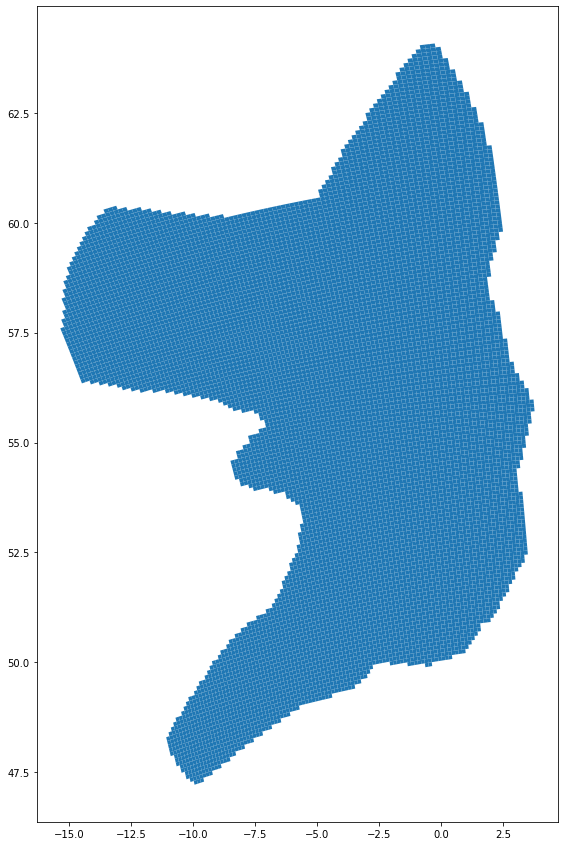

In [298]:
gb_map = gpd.read_file('gb_10km.shp')
gb_map = gb_map.to_crs(epsg=4326)

fig, ax = plt.subplots(figsize=(15,15))
gb_map.plot(ax=ax)

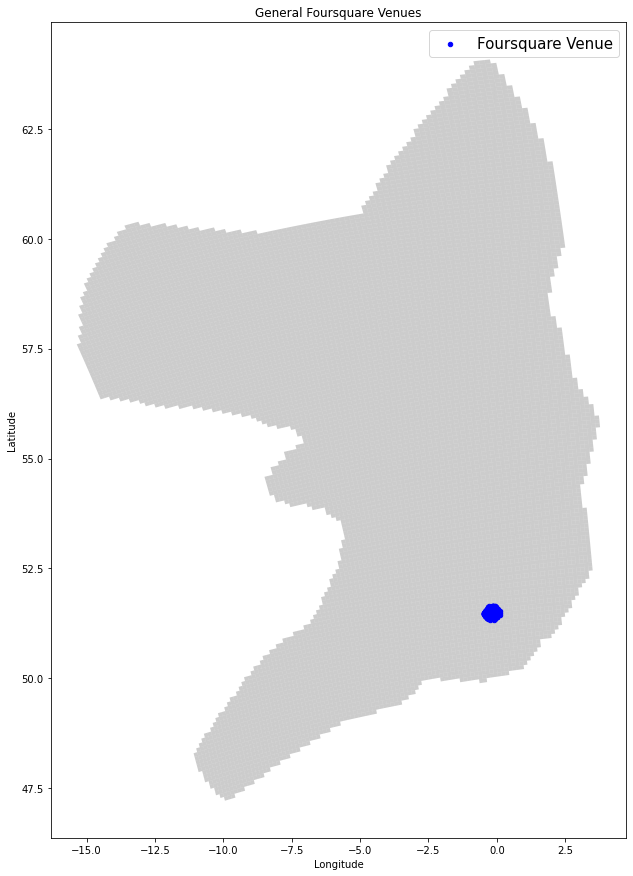

In [299]:
fig, ax = plt.subplots(figsize=(15,15))
gb_map.plot(ax=ax, alpha=0.4, color='gray')
vendor_geo_df.plot(ax=ax, markersize=20, color='blue', marker='o', label='Foursquare Venue')
plt.title('General Foursquare Venues')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(prop={'size':15})